### Importing all relevant libraries 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Loading Data File and checking it's content

In [3]:
data = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print(data.shape)

(205, 26)


In [5]:
print(data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


### Check for any missing value

In [6]:
data.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [10]:
data['fueltype'] = labelEncoder.fit_transform(data['fueltype'])
data['aspiration'] = labelEncoder.fit_transform(data['aspiration'])
data['carbody'] = labelEncoder.fit_transform(data['carbody'])
data['drivewheel'] = labelEncoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelEncoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelEncoder.fit_transform(data['fuelsystem'])
data['enginetype'] = labelEncoder.fit_transform(data['enginetype'])
data['cylindernumber'] = labelEncoder.fit_transform(data['cylindernumber'])
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [12]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


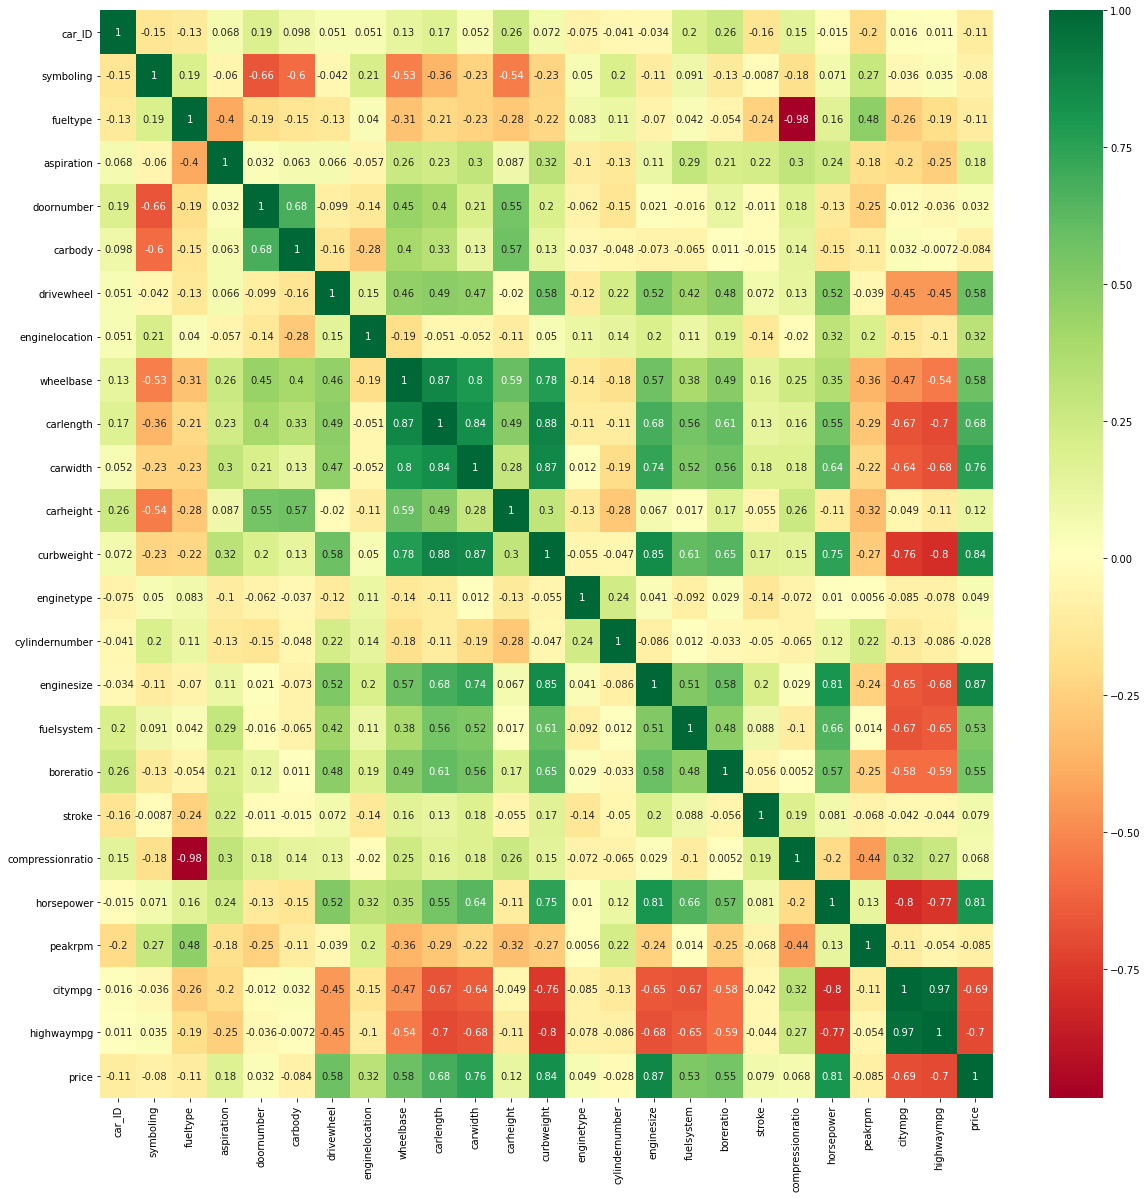

In [13]:
corrmat = data.corr()
corr_features = corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(data[corr_features].corr(), annot=True, cmap='RdYlGn')

In [15]:
data1 = data[['horsepower', 'boreratio', 'enginesize', 'curbweight', 'carwidth', 'carlength', 
              'wheelbase', 'drivewheel', 'price', 'enginelocation']]
print(data1.shape)
data1.head()

(205, 10)


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


### Data Spliting

In [20]:
x = (data1.loc[:, data1.columns != 'price'])
y = (data1.loc[:, data1.columns == 'price'])
#x.head()
#y.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
#print(x_train)

### Model Creation

In [26]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1, input_shape=(1, )))
network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
network.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 226348482.6667 - mae: 13097.1146
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 250767941.3333 - mae: 13679.0745
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 226701165.3333 - mae: 13040.3958
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 225604642.6667 - mae: 12932.0229
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 189541106.6667 - mae: 12135.1680
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 197936754.6667 - mae: 12272.4544
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 193732328.0000 - mae: 12007.5109
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 220646706.6667 - mae: 12571.0988
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 223484181.3333 - mae: 12604.6603
Epoch 10/100
5/5 [==============================] - 0s 2ms/step 

In [24]:
y_pred = network.predict(x_test)
print(y_pred)
test_loss, test_acc = network.evaluate(x_test, y_test)
print(test_loss, test_acc)

[[18100.988]
 [16763.834]
 [12786.036]
 [14602.461]
 [20267.688]
 [11210.602]
 [12415.715]
 [11767.666]
 [13461.963]
 [12286.505]
 [14676.565]
 [12082.752]
 [14785.133]
 [13333.671]
 [21881.94 ]
 [11084.951]
 [ 8277.278]
 [15730.8  ]
 [13252.614]
 [12902.283]
 [13276.412]
 [17166.842]
 [11109.504]
 [ 9562.596]
 [10969.973]
 [18838.883]
 [14132.633]
 [16553.088]
 [11261.865]
 [15961.667]
 [19133.18 ]
 [10863.305]
 [12432.322]
 [16690.332]
 [11908.256]
 [19023.936]
 [13795.53 ]
 [12950.359]
 [10589.609]
 [16181.739]
 [12609.998]
 [14695.039]
 [16577.014]
 [12388.054]
 [10933.737]
 [12618.873]
 [10863.305]
 [11709.662]
 [17580.225]
 [15624.18 ]
 [10419.908]
 [16598.81 ]
 [11122.734]
 [12906.998]
 [11198.833]
 [13922.309]
 [14152.027]
 [12950.359]
 [15994.265]
 [10636.303]
 [13063.908]
 [17056.947]]
2/2 [==============================] - 0s 4ms/step - loss: 38276640.0000 - mae: 4548.2368
38276640.0 4548.23681640625
